# K-Means, Hierarchical Clustering, DBSCAN and Silhouette Score

## Import required Libraries

In [ ]:
#pip install sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
%matplotlib inline

In [27]:
np.__version__

'1.24.4'

## 1. Load Dataset

In [15]:
# Here, we create a simple synthetic dataset with 3 clusters using make_blobs for illustration purposes
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

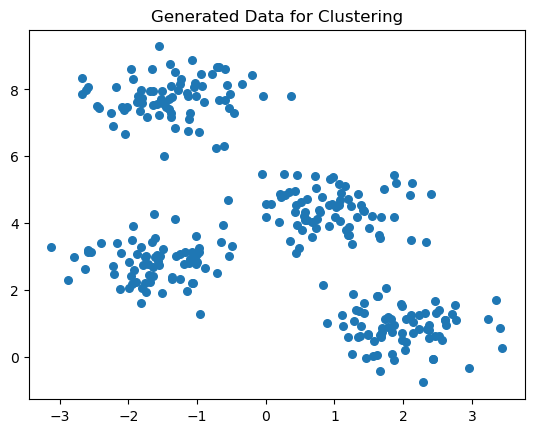

In [21]:
# Plotting the generated data
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Generated Data for Clustering")
plt.show()

## 2. Standardize the data

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3. K-Means Clustering

In [35]:
# === 1. K-Means Clustering ===
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(X)
kmeans_centers = kmeans.cluster_centers_

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Plot KMeans clustering results

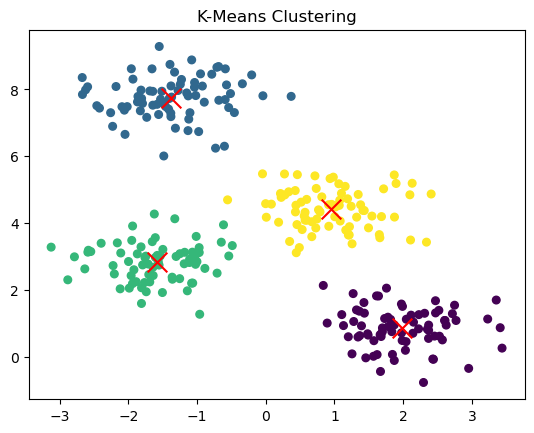

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='red', marker='x', s=200)  # Cluster centers
plt.title("K-Means Clustering")
plt.show()


### Silhouette Score for KMeans

In [44]:
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.6819938690643478


## 2. Hierarchical Clustering

In [57]:
# === 2. Hierarchical Clustering ===
Hirarchy = linkage(X, method='ward')

### Plotting Dendrogram for Hierarchical Clustering

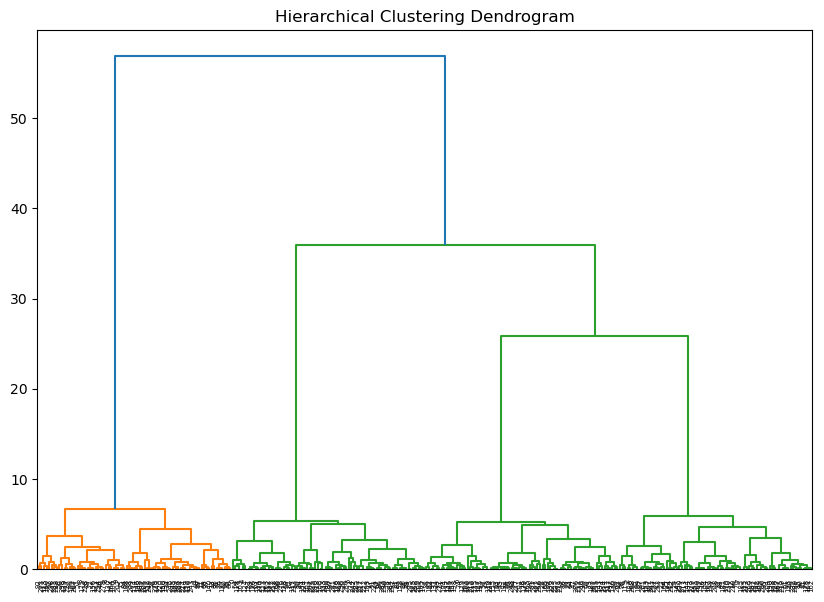

In [60]:
plt.figure(figsize=(10, 7))
dendrogram(Hirarchy)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

### Plot Hierarchical clustering results

In [67]:
# Cut the tree to form clusters (cut at a distance of 15 in this case)
from scipy.cluster.hierarchy import fcluster
hierarchical_labels = fcluster(Hirarchy, t=15, criterion='distance')

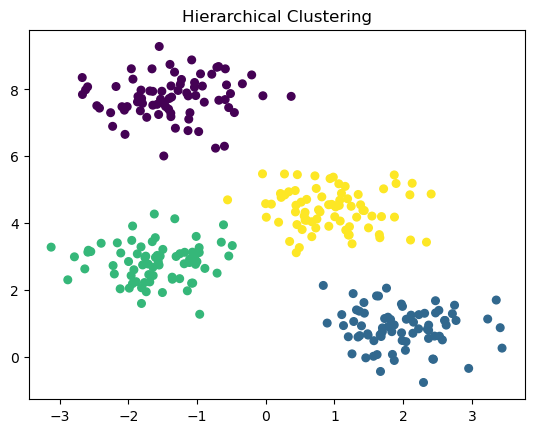

In [73]:
# Plot Hierarchical clustering results
plt.scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis', s=30)
plt.title("Hierarchical Clustering")
plt.show()

### Silhouette Score for Hierarchical Clustering

In [76]:
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")

Hierarchical Clustering Silhouette Score: 0.6819938690643478


# 3. DBSCAN Clustering 

In [81]:
# === 3. DBSCAN Clustering ===
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

### Plot DBSCAN clustering results

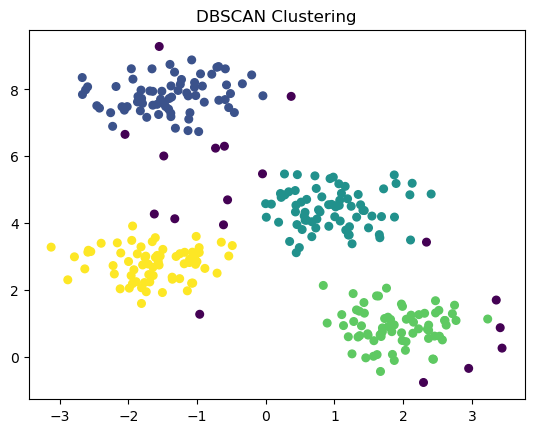

In [84]:
# Plot DBSCAN clustering results
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=30)
plt.title("DBSCAN Clustering")
plt.show()

### Silhouette Score for DBSCAN

In [89]:
# Silhouette Score for DBSCAN (only for non-noise points)
# DBSCAN labels -1 represent noise, so we exclude them for silhouette score calculation
dbscan_silhouette = silhouette_score(X[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

DBSCAN Silhouette Score: 0.709290307841025
